In [1]:
%matplotlib inline

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
def plot(df_in, ylabel, col, filter_mimic=False, xlabel='Bit string size'):
    df = df_in.copy()
    if filter_mimic:
        df = df[df.algo != algos['mimic']]
    fig, ax = plt.subplots()
    for label, df_ in df.groupby(['algo']):
        df_.groupby('bitstring_size')[col].agg(np.mean).plot(ax=ax, label=label)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend();
    
def table(df):
    a = df.groupby(['algo', 'bitstring_size'])[['val', 'time']].agg([np.mean, np.std])
    return a

def read(name, prefix):
    path = '{}/{}.csv'.format(prefix, name)
    df = pd.read_csv(path)
    df['algo'] = df.algo.replace(algos)
    return df

def plots(df, xlabel='Bit string size'):
    plot(df, 'Fitness', 'val', xlabel=xlabel)
    plot(df, 'Time (s)', 'time', xlabel=xlabel)
    plot(df, 'Time (s)', 'time', filter_mimic=True, xlabel=xlabel)

In [4]:
algos = {
    'ga': 'Genetic Algorithms',
    'sa': 'Simulated Annealing',
    'rhc': 'Randomized Hill Climbing',
    'mimic': 'MIMIC'
}

prefix = 'output'

## Flip Flop

In [5]:
ff = read('flipflop', prefix)
ff.head(3)

,algo,iter,bitstring_size,val,time
0,Randomized Hill Climbing,1,10,8.0,0.046556
1,Randomized Hill Climbing,2,10,8.0,0.046160
2,Randomized Hill Climbing,3,10,9.0,0.031111


In [182]:
ff.shape

(600, 5)

In [184]:
table(ff)

val                 time  \
                                               mean       std       mean   
algo                     bitstring_size                                    
Genetic Algorithms       10                9.000000  0.000000   0.046032   
                         25               23.166667  0.791478   0.052757   
                         50               46.000000  1.438390   0.057082   
                         100              87.966667  2.370557   0.090463   
                         200             158.233333  3.510411   0.159983   
MIMIC                    10                8.933333  0.253708   0.195793   
                         25               22.866667  0.730297   0.548204   
                         50               46.700000  1.118805   1.401743   
                         100              93.866667  1.455864   3.845081   
                         200             187.433333  1.887953  12.326035   
Randomized Hill Climbing 10                7.900000  0.711967   0.026754   
                         25               20.133333  1.224276   0.016883   
                         50               40.133333  2.096521   0.023636   
                         100              81.300000  3.677987   0.045259   
                         200             163.300000  4.268166   0.087374   
Simulated Annealing      10                9.000000  0.000000   0.131502   
                         25               24.000000  0.000000   0.122569   
                         50               49.000000  0.000000   0.133924   
                         100              98.666667  0.479463   0.160639   
                         200             197.500000  1.074789   0.187395   

                                                   
                                              std  
algo                     bitstring_size            
Genetic Algorithms       10              0.010351  
                         25              0.004545  
                         50              0.003531  
                         100             0.006998  
                         200             0.026597  
MIMIC                    10              0.020392  
                         25              0.031030  
                         50              0.088521  
                         100             0.148674  
                         200             0.654183  
Randomized Hill Climbing 10              0.011212  
                         25              0.001025  
                         50              0.002450  
                         100             0.003960  
                         200             0.008267  
Simulated Annealing      10              0.009723  
                         25              0.005164  
                         50              0.009730  
                         100             0.015061  
                         200             0.007643

In [10]:
table(ff[ff.bitstring_size == 200])

val                 time  \
                                               mean       std       mean   
algo                     bitstring_size                                    
Genetic Algorithms       200             158.233333  3.510411   0.159983   
MIMIC                    200             187.433333  1.887953  12.326035   
Randomized Hill Climbing 200             163.300000  4.268166   0.087374   
Simulated Annealing      200             197.500000  1.074789   0.187395   

                                                   
                                              std  
algo                     bitstring_size            
Genetic Algorithms       200             0.026597  
MIMIC                    200             0.654183  
Randomized Hill Climbing 200             0.008267  
Simulated Annealing      200             0.007643

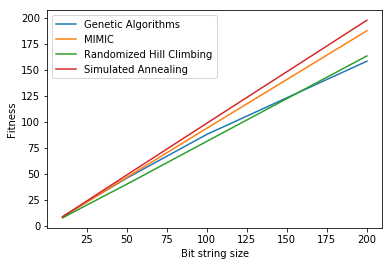

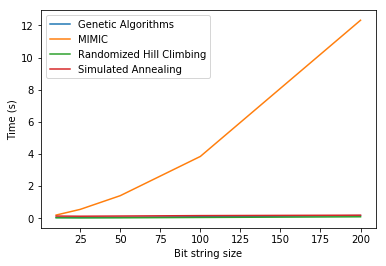

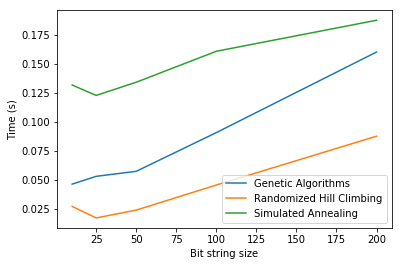

In [187]:
plots(ff)

## Traveling Salesman

In [22]:
tsm = read('tsm', prefix)

In [23]:
tsm.head(3)

,algo,iter,bitstring_size,val,time
0,Randomized Hill Climbing,1,10,0.355832,0.065438
1,Randomized Hill Climbing,2,10,0.353517,0.058552
2,Randomized Hill Climbing,3,10,0.347723,0.037370


In [24]:
tsm.shape

(360, 5)

In [29]:
table(tsm[tsm.bitstring_size == 50])

val                 time  \
                                             mean       std       mean   
algo                     bitstring_size                                  
Genetic Algorithms       50              0.150622  0.010970   0.410861   
MIMIC                    50              0.087859  0.007197  17.962625   
Randomized Hill Climbing 50              0.117750  0.009788   0.083957   
Simulated Annealing      50              0.119003  0.009386   0.281163   

                                                   
                                              std  
algo                     bitstring_size            
Genetic Algorithms       50              0.031259  
MIMIC                    50              0.261454  
Randomized Hill Climbing 50              0.005182  
Simulated Annealing      50              0.010581

In [25]:
table(tsm)

val                     time  \
                                             mean           std       mean   
algo                     bitstring_size                                      
Genetic Algorithms       10              0.348299  5.020494e-03   0.104265   
                         25              0.235688  3.135105e-17   0.203942   
                         50              0.150622  1.096998e-02   0.410861   
MIMIC                    10              0.332806  2.039326e-02   0.420066   
                         25              0.180719  1.725839e-02   2.464884   
                         50              0.087859  7.197018e-03  17.962625   
Randomized Hill Climbing 10              0.348778  1.714827e-02   0.032323   
                         25              0.198382  1.403418e-02   0.043760   
                         50              0.117750  9.788477e-03   0.083957   
Simulated Annealing      10              0.345862  2.045278e-02   0.201149   
                         25              0.195421  1.684091e-02   0.224532   
                         50              0.119003  9.386265e-03   0.281163   

                                                   
                                              std  
algo                     bitstring_size            
Genetic Algorithms       10              0.008121  
                         25              0.004061  
                         50              0.031259  
MIMIC                    10              0.030703  
                         25              0.065191  
                         50              0.261454  
Randomized Hill Climbing 10              0.011025  
                         25              0.001796  
                         50              0.005182  
Simulated Annealing      10              0.008663  
                         25              0.004903  
                         50              0.010581

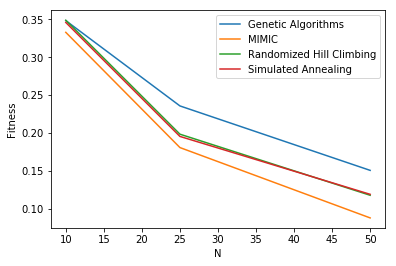

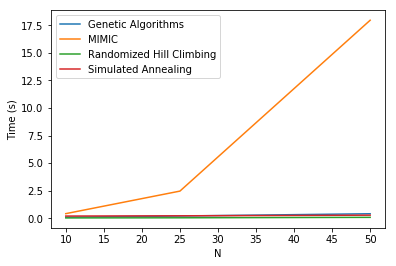

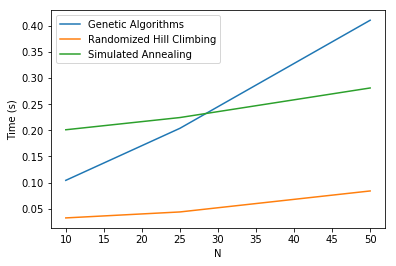

In [28]:
plots(tsm, xlabel='N')

## Four peaks

In [35]:
def four_peaks(bs, t):
    i = 0
    while (i < len(bs) and bs[i] == 1):
        i += 1
        
    head = i
    i = len(bs) - 1
    
    while (i >=0 and bs[i] == 0):
        i -= 1
        
    tail = len(bs) - 1 - i
    r = 0
    if (head > t and tail > t):
        r = len(bs)
        
    print(tail, head, r)
    return max(tail, head) + r

In [37]:
four_peaks([1, 1, 0, 0, 0], 1)

3 2 5


8

In [38]:
fp = read('fourpeaks', prefix)

In [39]:
fp.shape

(480, 5)

In [40]:
fp.head(3)

,algo,iter,bitstring_size,val,time
0,Randomized Hill Climbing,1,20,20.0,0.052466
1,Randomized Hill Climbing,2,20,20.0,0.038216
2,Randomized Hill Climbing,3,20,20.0,0.023783


In [65]:
fp[(fp.bitstring_size == 100) & (fp.algo == 'MIMIC')]['val'].value_counts(normalize=True)

100.0    0.766667
189.0    0.233333
Name: val, dtype: float64

In [66]:
fp[(fp.bitstring_size == 100) & (fp.algo == 'Simulated Annealing')]['val'].value_counts(normalize=True)

100.0    0.866667
189.0    0.133333
Name: val, dtype: float64

In [68]:
fp[(fp.bitstring_size == 100) & (fp.algo == 'Randomized Hill Climbing')]['val'].value_counts(normalize=True)

100.0    0.966667
189.0    0.033333
Name: val, dtype: float64

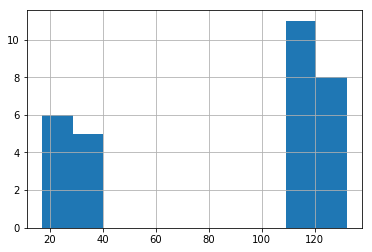

In [73]:
fp[(fp.bitstring_size == 100) & (fp.algo == 'Genetic Algorithms')]['val'].hist()

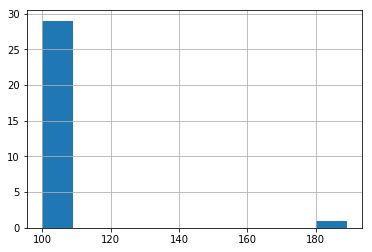

In [60]:
fp[(fp.bitstring_size == 100) & (fp.algo == 'Randomized Hill Climbing')]['val'].hist()

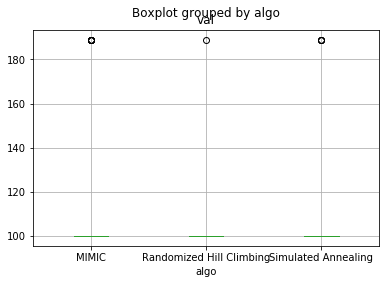

In [52]:
fp[(fp.bitstring_size == 100) & (fp.algo != 'Genetic Algorithms')].boxplot('val', by='algo')

In [48]:
fp[(fp.algo == 'MIMIC') & (fp.bitstring_size == 100)].describe()

,iter,bitstring_size,val,time
count,30.000000,30.0,30.000000,30.000000
mean,15.500000,100.0,120.766667,3.682052
std,8.803408,0.0,38.286293,0.073964
min,1.000000,100.0,100.000000,3.525680
25%,8.250000,100.0,100.000000,3.612115
50%,15.500000,100.0,100.000000,3.689513
75%,22.750000,100.0,100.000000,3.738978
max,30.000000,100.0,189.000000,3.812525


In [41]:
table(fp)

val                 time  \
                                               mean        std      mean   
algo                     bitstring_size                                    
Genetic Algorithms       20               37.000000   0.000000  0.045071   
                         50               72.500000   5.709943  0.052271   
                         80               94.233333  12.973935  0.064858   
                         100              87.300000  47.305427  0.075050   
MIMIC                    20               37.000000   0.000000  0.402536   
                         50               91.066667  11.163158  1.284483   
                         80              103.666667  34.041894  2.623392   
                         100             120.766667  38.286293  3.682052   
Randomized Hill Climbing 20               23.966667   7.313112  0.022668   
                         50               51.466667   8.033264  0.022478   
                         80               80.000000   0.000000  0.031859   
                         100             102.966667  16.249103  0.040051   
Simulated Annealing      20               34.166667   6.443833  0.125619   
                         50               80.800000  20.508030  0.124929   
                         80              103.666667  34.041894  0.131897   
                         100             111.866667  30.771385  0.140682   

                                                   
                                              std  
algo                     bitstring_size            
Genetic Algorithms       20              0.006224  
                         50              0.002691  
                         80              0.003143  
                         100             0.004095  
MIMIC                    20              0.018143  
                         50              0.021907  
                         80              0.104885  
                         100             0.073964  
Randomized Hill Climbing 20              0.011971  
                         50              0.001920  
                         80              0.002956  
                         100             0.003906  
Simulated Annealing      20              0.015326  
                         50              0.003740  
                         80              0.003732  
                         100             0.002665

In [44]:
table(fp[fp.bitstring_size == 100])

val                 time  \
                                               mean        std      mean   
algo                     bitstring_size                                    
Genetic Algorithms       100              87.300000  47.305427  0.075050   
MIMIC                    100             120.766667  38.286293  3.682052   
Randomized Hill Climbing 100             102.966667  16.249103  0.040051   
Simulated Annealing      100             111.866667  30.771385  0.140682   

                                                   
                                              std  
algo                     bitstring_size            
Genetic Algorithms       100             0.004095  
MIMIC                    100             0.073964  
Randomized Hill Climbing 100             0.003906  
Simulated Annealing      100             0.002665

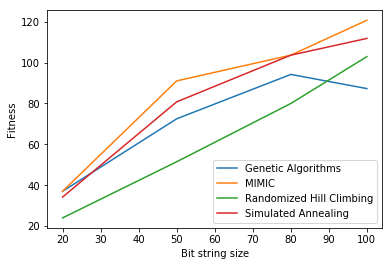

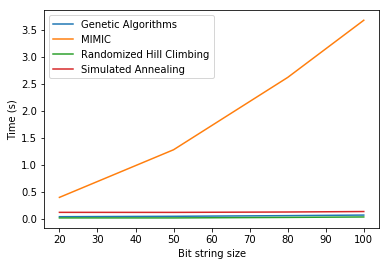

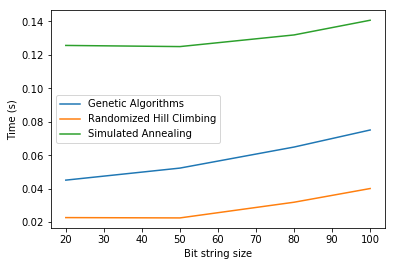

In [43]:
plots(fp)